# 1. Install Dependencies and Setup

In [3]:
import tensorflow as tf
import os
import cv2
import imghdr

## 2. Remove dodgy images


In [4]:
data_dir='/content/drive/MyDrive/Colab Notebooks/project images'

In [2]:
img_ext=['png','jpg','jpeg','bmp']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in img_ext:
        print('image not in exist list {} ',format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('issue with image {} ', format(image_path))
      # os.remove(image_path)



## 3. Load Data

In [ ]:
tf.data.Dataset??

In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/project images',
                                                 batch_size=32,image_size=(180,180))

Found 20721 files belonging to 7 classes.


In [7]:
# images represented as numpy arrays
data_iterator=data.as_numpy_iterator()



In [8]:
batch=data_iterator.next()

In [9]:
len(batch)

2

In [10]:
batch[0].shape

(32, 180, 180, 3)

In [11]:
batch[1]

array([6, 4, 1, 3, 0, 0, 2, 5, 2, 2, 2, 4, 4, 2, 1, 5, 4, 0, 1, 4, 1, 4,
       0, 0, 6, 5, 0, 5, 1, 3, 5, 6], dtype=int32)

3.1 Plot the images with respect to labels



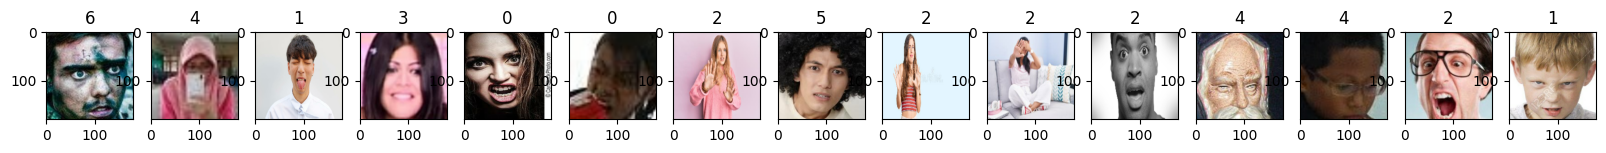

In [12]:
fig, ax = plt.subplots(ncols=15, figsize=(20,20))
for idx, img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

3.2 Plot images for unique labels

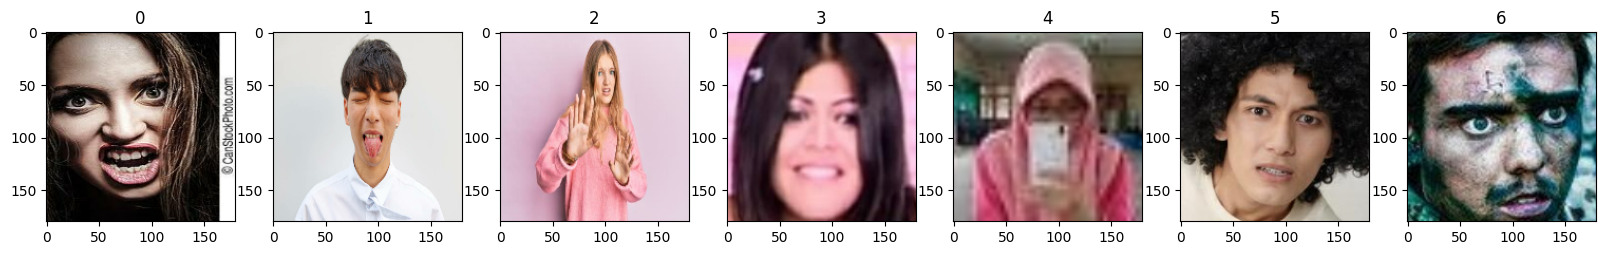

In [13]:
images = batch[0]
labels = batch[1]
# Step 1: Get unique labels
unique_labels = np.unique(labels)

# Step 2 and 3: Plot one image per unique label
fig, ax = plt.subplots(ncols=len(unique_labels), figsize=(20, 20))

for idx, label in enumerate(unique_labels):
    # Find the index of the first image with the current label
    image_index = np.where(labels == label)[0][0]

    ax[idx].imshow(images[image_index].astype(int))
    ax[idx].title.set_text(label)

plt.show()


# 4.Preprocessing Data

4.1.   scale data




In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()[0].max()

1.0

4.2. Split data

In [16]:
len(data)

648

In [17]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [18]:
test_size+val_size+train_size

648

In [19]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [20]:
print(len(test))
print(len(train))
print(len(val))

65
453
130


## *5*.  Deep Model

5.1.   Building deep learning model
  





In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [40]:
model=Sequential()
# model.add(data_augmentation)

In [41]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))



model.add(Flatten())

model.add(Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))



In [42]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 89, 89, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 20, 20, 64)       

## 5.2 Train

In [44]:
logdir='/content/drive/MyDrive/save model'

In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [46]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
453/453 [==============================] - 81s 169ms/step - loss: 1.8919 - accuracy: 0.2293 - val_loss: 1.7922 - val_accuracy: 0.2724
Epoch 2/20
453/453 [==============================] - 80s 175ms/step - loss: 1.7754 - accuracy: 0.2761 - val_loss: 1.7702 - val_accuracy: 0.2764
Epoch 3/20
453/453 [==============================] - 80s 175ms/step - loss: 1.7521 - accuracy: 0.2907 - val_loss: 1.7328 - val_accuracy: 0.3050
Epoch 4/20
453/453 [==============================] - 80s 175ms/step - loss: 1.7396 - accuracy: 0.2937 - val_loss: 1.7484 - val_accuracy: 0.2993
Epoch 5/20
453/453 [==============================] - 77s 169ms/step - loss: 1.7279 - accuracy: 0.3050 - val_loss: 1.7294 - val_accuracy: 0.3072
Epoch 6/20
453/453 [==============================] - 80s 177ms/step - loss: 1.7157 - accuracy: 0.3142 - val_loss: 1.7222 - val_accuracy: 0.3151
Epoch 7/20
453/453 [==============================] - 81s 178ms/step - loss: 1.7055 - accuracy: 0.3208 - val_loss: 1.6981 - val_ac

## 6. Plot Performance

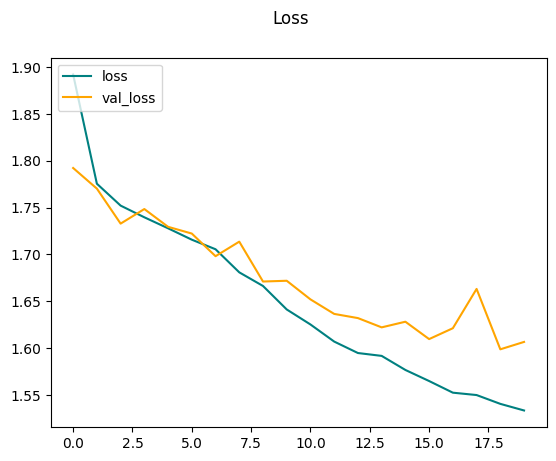

In [47]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=12)
plt.legend(loc="upper left")
plt.show()

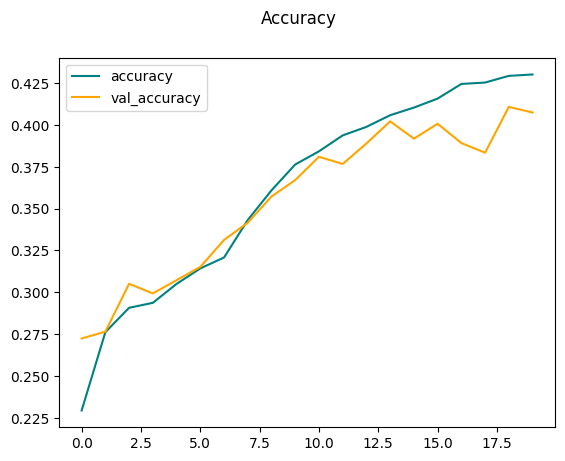

In [48]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=12)
plt.legend(loc="upper left")
plt.show()

## 7. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, sparse_categorical_accuracy

In [ ]:
pre = Precision()
re = Recall()


In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)


1/1 [==============================] - 0s 112ms/step


ValueError: ignored

In [ ]:
print(pre.result(), re.result())